In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gender

### AmsterdamUMCdb

In [16]:
umc_gender = pd.read_csv('D:/AmsterdamUMCdb-v1.0.2/admissions.csv', usecols=['gender']).gender

print('Men:   %.1f%%' % (100 * np.mean(umc_gender == 'Man')))
print('Women: %.1f%%' % (100 * np.mean(umc_gender == 'Vrouw')))

Men:   63.8%
Women: 34.1%


In [18]:
print('Men:   %d' % np.sum(umc_gender == 'Man'))
print('Women: %d' % np.sum(umc_gender == 'Vrouw'))

Men:   14735
Women: 7875


### MIMIC-III

In [4]:
mimic_gender = pd.read_csv('D:/mimic-iii-clinical-database-1.4/PATIENTS.csv', usecols=['SUBJECT_ID', 'GENDER'])

# limit admissions to those who eventually went to IC
patients_in_icu = pd.read_csv('D:/mimic-iii-clinical-database-1.4/ICUSTAYS.csv', usecols=['SUBJECT_ID']).SUBJECT_ID.unique()
mimic_gender = mimic_gender[mimic_gender.SUBJECT_ID.isin(patients_in_icu)].GENDER

print('Men:   %.1f%%' % (100 * np.mean(mimic_gender == 'M')))
print('Women: %.1f%%' % (100 * np.mean(mimic_gender == 'F')))

Men:   56.1%
Women: 43.9%


In [7]:
print('Men:   %d' % np.sum(mimic_gender == 'M'))
print('Women: %d' % np.sum(mimic_gender == 'F'))

Men:   26096
Women: 20380


## Age

### AmsterdamUMCdb

In [20]:
umc_age = pd.read_csv('D:/AmsterdamUMCdb-v1.0.2/admissions.csv', usecols=['agegroup']).agegroup

agegroups = {
    '60-69': 65,
    '70-79': 75,
    '50-59': 55,
    '18-39': 28.5,
    '80+': 85,
    '40-49': 45,
}

umc_age = umc_age.transform(lambda x: agegroups[x])

In [22]:
print('Mean:', np.mean(umc_age))
print('SD:  ', np.std(umc_age))

Mean: 61.9613303903748
SD:   16.064631049503685


### MIMIC-III

In [45]:
mimic_age = pd.read_csv('D:/mimic-iii-clinical-database-1.4/PATIENTS.csv', usecols=['SUBJECT_ID', 'DOB'])
mimic_adm = pd.read_csv('D:/mimic-iii-clinical-database-1.4/ADMISSIONS.csv', usecols=['SUBJECT_ID', 'ADMITTIME']) 
mimic_age = mimic_age.merge(mimic_adm, on='SUBJECT_ID').dropna(axis=0)

mimic_age.ADMITTIME = pd.to_datetime(mimic_age.ADMITTIME).dt.date
mimic_age.DOB = pd.to_datetime(mimic_age.DOB).dt.date

mimic_age['age'] = mimic_age.apply(lambda e: (e.ADMITTIME - e.DOB).days/365, axis=1)
mimic_age = mimic_age[mimic_age.age > 17].age

In [46]:
print('Mean:', np.mean(mimic_age))
print('SD:  ', np.std(mimic_age))

Mean: 74.7882821537852
SD:   55.04342066888314


## SIRS core on admission

### AmsterdamUMCdb

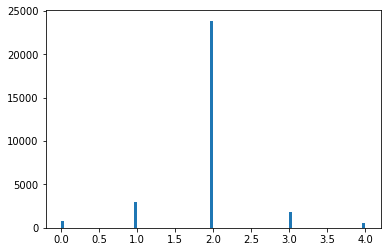

In [75]:
# determine where SIRS score is stored in dataset
with open('../preprocessing/datasets/amsterdam-umc-db/aggregated_full_cohort_2h/state_space_features.txt') as file:
    i = [f.strip() for f in file.readlines()].index('sirs_score')

umc_sirs = pd.read_csv('../preprocessing/datasets/amsterdam-umc-db/aggregated_full_cohort_2h/valid.csv', usecols=['x%d' % i])

# Rescale sirs from 0 to 4
umc_sirs = umc_sirs - umc_sirs.min()
umc_sirs = 4 * umc_sirs / umc_sirs.max()

plt.hist(umc_sirs, bins=100);

In [76]:
print('Mean:', np.mean(umc_sirs))
print('SD:  ', np.std(umc_sirs))

Mean: x82    1.939824
dtype: float64
SD:   x82    0.582726
dtype: float64


## MIMIC-III

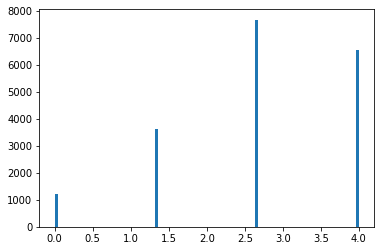

In [78]:
# determine where SIRS score is stored in dataset
with open('../preprocessing/datasets/mimic-iii/aggregated_full_cohort_2h/state_space_features.txt') as file:
    i = [f.strip() for f in file.readlines()].index('sirs_score')

mimic_sirs = pd.read_csv('../preprocessing/datasets/mimic-iii/aggregated_full_cohort_2h/valid.csv', usecols=['x%d' % i])

# Rescale sirs from 0 to 4
mimic_sirs = mimic_sirs - mimic_sirs.min()
mimic_sirs = 4 * mimic_sirs / mimic_sirs.max()

plt.hist(mimic_sirs, bins=100);

In [79]:
print('Mean:', np.mean(mimic_sirs))
print('SD:  ', np.std(mimic_sirs))

Mean: x3    2.702843
dtype: float64
SD:   x3    1.183183
dtype: float64
